# Unsupervised Machine Learning Clustering
## Finding clusters in a Pokemon dataset

source: https://www.kaggle.com/datasets/guavocado/pokemon-stats-1025-pokemons


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv('pokemon_data.xls')
df

dexnum          name  generation     type1    type2  \
0          1     Bulbasaur           1     Grass   Poison   
1          2       Ivysaur           1     Grass   Poison   
2          3      Venusaur           1     Grass   Poison   
3          4    Charmander           1      Fire      NaN   
4          5    Charmeleon           1      Fire      NaN   
...      ...           ...         ...       ...      ...   
1020    1021   Raging Bolt           9  Electric   Dragon   
1021    1022  Iron Boulder           9      Rock  Psychic   
1022    1023    Iron Crown           9     Steel  Psychic   
1023    1024     Terapagos           9    Normal      NaN   
1024    1025     Pecharunt           9    Poison    Ghost   

                  species  height  weight          ability1     ability2  \
0            Seed Pokémon     0.7     6.9          Overgrow  Chlorophyll   
1            Seed Pokémon     1.0    13.0          Overgrow  Chlorophyll   
2            Seed Pokémon     2.0   100.0          Overgrow  Chlorophyll   
3          Lizard Pokémon     0.6     8.5             Blaze  Solar Power   
4           Flame Pokémon     1.1    19.0             Blaze  Solar Power   
...                   ...     ...     ...               ...          ...   
1020      Paradox Pokémon     5.2   480.0    Protosynthesis          NaN   
1021      Paradox Pokémon     1.5   162.5       Quark Drive          NaN   
1022      Paradox Pokémon     1.6   156.0       Quark Drive          NaN   
1023         Tera Pokémon     0.2     6.5        Tera Shift          NaN   
1024  Subjugation Pokémon     0.3     0.3  Poison Puppeteer          NaN   

     hidden_ability   hp  attack  defense  sp_atk  sp_def  speed  total  \
0               NaN   45      49       49      65      65     45    318   
1               NaN   60      62       63      80      80     60    405   
2               NaN   80      82       83     100     100     80    525   
3               NaN   39      52       43      60      50     65    309   
4               NaN   58      64       58      80      65     80    405   
...             ...  ...     ...      ...     ...     ...    ...    ...   
1020            NaN  125      73       91     137      89     75    590   
1021            NaN   90     120       80      68     108    124    590   
1022            NaN   90      72      100     122     108     98    590   
1023            NaN   90      65       85      65      85     60    450   
1024            NaN   88      88      160      88      88     88    600   

                  ev_yield  catch_rate base_friendship base_exp  growth_rate  \
0                1 Sp. Atk          45              50       64  Medium Slow   
1     1 Sp. Atk, 1 Sp. Def          45              50      142  Medium Slow   
2     2 Sp. Atk, 1 Sp. Def          45              50      236  Medium Slow   
3                  1 Speed          45              50       62  Medium Slow   
4       1 Sp. Atk, 1 Speed          45              50      142  Medium Slow   
...                    ...         ...             ...      ...          ...   
1020             3 Sp. Atk          10               —        —         Slow   
1021               3 Speed          10               —        —         Slow   
1022             3 Sp. Atk          10               —        —         Slow   
1023             1 Defense         255               —        —         Slow   
1024             3 Defense           3               —        —         Slow   

        egg_group1 egg_group2  percent_male  percent_female egg_cycles  \
0           Grass     Monster          87.5            12.5         20   
1           Grass     Monster          87.5            12.5         20   
2           Grass     Monster          87.5            12.5         20   
3          Dragon     Monster          87.5            12.5         20   
4          Dragon     Monster          87.5            12.5         20   
...            ...        ...           ...           

# Prepare the data
Drop columns that I can't use

In [3]:
df.columns

Index(['dexnum', 'name', 'generation', 'type1', 'type2', 'species', 'height',
       'weight', 'ability1', 'ability2', 'hidden_ability', 'hp', 'attack',
       'defense', 'sp_atk', 'sp_def', 'speed', 'total', 'ev_yield',
       'catch_rate', 'base_friendship', 'base_exp', 'growth_rate',
       'egg_group1', 'egg_group2', 'percent_male', 'percent_female',
       'egg_cycles', 'special_group'],
      dtype='object')

In [4]:
df.drop(columns=['dexnum', 'species', 'ability1', 'ability2', 'hidden_ability','ev_yield','egg_group1','egg_group2','percent_male','percent_female'], inplace=True)

In [5]:
df

name  generation     type1    type2  height  weight   hp  \
0        Bulbasaur           1     Grass   Poison     0.7     6.9   45   
1          Ivysaur           1     Grass   Poison     1.0    13.0   60   
2         Venusaur           1     Grass   Poison     2.0   100.0   80   
3       Charmander           1      Fire      NaN     0.6     8.5   39   
4       Charmeleon           1      Fire      NaN     1.1    19.0   58   
...            ...         ...       ...      ...     ...     ...  ...   
1020   Raging Bolt           9  Electric   Dragon     5.2   480.0  125   
1021  Iron Boulder           9      Rock  Psychic     1.5   162.5   90   
1022    Iron Crown           9     Steel  Psychic     1.6   156.0   90   
1023     Terapagos           9    Normal      NaN     0.2     6.5   90   
1024     Pecharunt           9    Poison    Ghost     0.3     0.3   88   

      attack  defense  sp_atk  sp_def  speed  total  catch_rate  \
0         49       49      65      65     45    318          45   
1         62       63      80      80     60    405          45   
2         82       83     100     100     80    525          45   
3         52       43      60      50     65    309          45   
4         64       58      80      65     80    405          45   
...      ...      ...     ...     ...    ...    ...         ...   
1020      73       91     137      89     75    590          10   
1021     120       80      68     108    124    590          10   
1022      72      100     122     108     98    590          10   
1023      65       85      65      85     60    450         255   
1024      88      160      88      88     88    600           3   

     base_friendship base_exp  growth_rate egg_cycles    special_group  
0                 50       64  Medium Slow         20         Ordinary  
1                 50      142  Medium Slow         20         Ordinary  
2                 50      236  Medium Slow         20         Ordinary  
3                 50       62  Medium Slow         20         Ordinary  
4                 50      142  Medium Slow         20         Ordinary  
...              ...      ...          ...        ...              ...  
1020               —        —         Slow          —  Ancient Paradox  
1021               —        —         Slow          —   Future Paradox  
1022               —        —         Slow          —   Future Paradox  
1023               —        —         Slow          —        Legendary  
1024               —        —         Slow          —         Mythical  

[1025 rows x 19 columns]

In [6]:
# Create a new column 'type2_flag' where '0' indicates NaN and '1' indicates non-NaN
df['dual_type'] = np.where(df['type2'].isna(), '0', '1').astype(int)

In [7]:
df

name  generation     type1    type2  height  weight   hp  \
0        Bulbasaur           1     Grass   Poison     0.7     6.9   45   
1          Ivysaur           1     Grass   Poison     1.0    13.0   60   
2         Venusaur           1     Grass   Poison     2.0   100.0   80   
3       Charmander           1      Fire      NaN     0.6     8.5   39   
4       Charmeleon           1      Fire      NaN     1.1    19.0   58   
...            ...         ...       ...      ...     ...     ...  ...   
1020   Raging Bolt           9  Electric   Dragon     5.2   480.0  125   
1021  Iron Boulder           9      Rock  Psychic     1.5   162.5   90   
1022    Iron Crown           9     Steel  Psychic     1.6   156.0   90   
1023     Terapagos           9    Normal      NaN     0.2     6.5   90   
1024     Pecharunt           9    Poison    Ghost     0.3     0.3   88   

      attack  defense  sp_atk  sp_def  speed  total  catch_rate  \
0         49       49      65      65     45    318          45   
1         62       63      80      80     60    405          45   
2         82       83     100     100     80    525          45   
3         52       43      60      50     65    309          45   
4         64       58      80      65     80    405          45   
...      ...      ...     ...     ...    ...    ...         ...   
1020      73       91     137      89     75    590          10   
1021     120       80      68     108    124    590          10   
1022      72      100     122     108     98    590          10   
1023      65       85      65      85     60    450         255   
1024      88      160      88      88     88    600           3   

     base_friendship base_exp  growth_rate egg_cycles    special_group  \
0                 50       64  Medium Slow         20         Ordinary   
1                 50      142  Medium Slow         20         Ordinary   
2                 50      236  Medium Slow         20         Ordinary   
3                 50       62  Medium Slow         20         Ordinary   
4                 50      142  Medium Slow         20         Ordinary   
...              ...      ...          ...        ...              ...   
1020               —        —         Slow          —  Ancient Paradox   
1021               —        —         Slow          —   Future Paradox   
1022               —        —         Slow          —   Future Paradox   
1023               —        —         Slow          —        Legendary   
1024               —        —         Slow          —         Mythical   

      dual_type  
0             1  
1             1  
2             1  
3             0  
4             0  
...         ...  
1020          1  
1021          1  
1022          1  
1023          0  
1024          1  

[1025 rows x 20 columns]

In [8]:
df['growth_rate'].unique()

array(['Medium Slow', 'Medium Fast', 'Fast', 'Slow', 'Fluctuating',
       'Erratic'], dtype=object)

In [9]:
df_dummies = pd.get_dummies(df['growth_rate'], prefix='growth_rate', drop_first=True).astype(int)


In [10]:
df = pd.concat([df, df_dummies], axis=1)

In [11]:
df_nums = df.select_dtypes('number')

In [12]:
df_nums.drop(columns=['growth_rate_Fluctuating'], inplace=True)


# Skree plot

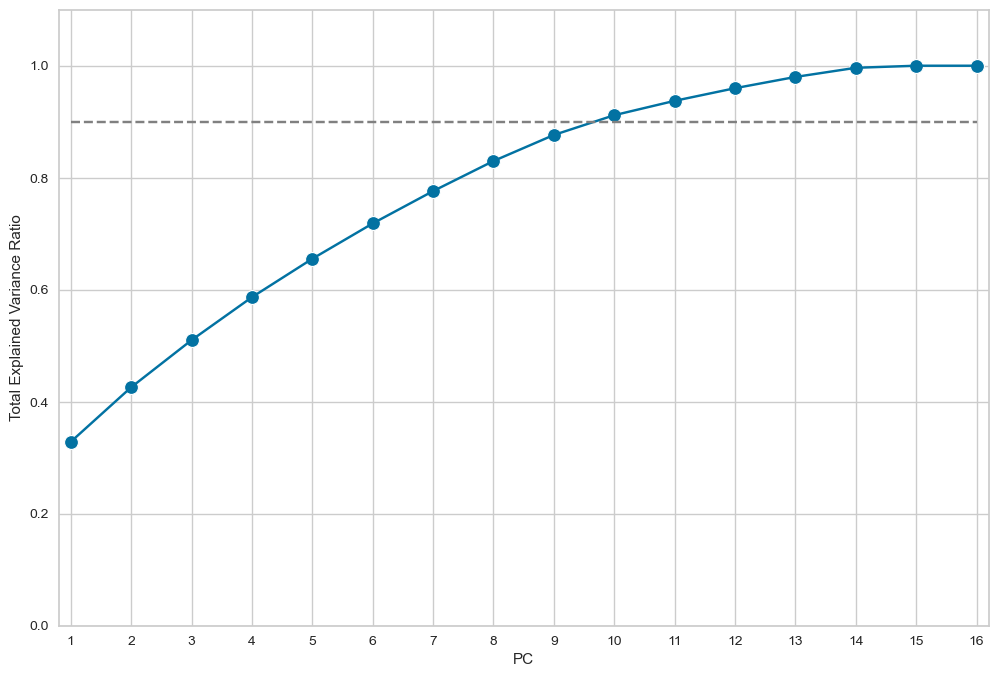

In [13]:
scaler = StandardScaler()
decomp = PCA()
pipe = make_pipeline(scaler, decomp)

pipe.fit(df_nums)

# Plot scree plot
explained_variance = pipe['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]

fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)
plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))
x_s, x_e = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))
ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='gray', linestyle='--')
plt.ylabel('Total Explained Variance Ratio')
plt.xlabel('PC')
plt.show()


In [14]:
scaler = StandardScaler()
decomp = PCA(n_components=.9) # Set below 1 for ratio, set integer to get actual number of components
pipe = make_pipeline(scaler, decomp)

pipe.fit(df_nums)

loadings = pipe['pca'].components_

# Iterate teh principal components
for i, component in enumerate(loadings):
    # get feature contribution for each component
    feature_contributions =  np.abs(component)
    
    # sort feature contributions descendingly and get the corresponding column index
    top_contributing_features = np.argsort(feature_contributions)[::-1]
    
    # Print top contributing column to each Principal Component
    print(f"Principal Component {i+1}")
    for feature_idx in top_contributing_features:
        print(f"Feature {feature_idx}: {feature_contributions[feature_idx]}")
    
    print()

Principal Component 1
Feature 9: 0.41965802001923425
Feature 10: 0.33481760499595353
Feature 4: 0.30750021054104437
Feature 3: 0.3021607829078791
Feature 7: 0.28612153062571066
Feature 6: 0.2828606477398645
Feature 5: 0.2787025595775026
Feature 1: 0.27392998328679796
Feature 2: 0.2638832207479522
Feature 15: 0.2394940417467886
Feature 8: 0.20707144550848217
Feature 11: 0.11536826147679068
Feature 13: 0.11423907096794741
Feature 0: 0.0835536816786405
Feature 14: 0.06708064038194385
Feature 12: 0.06022130623498682

Principal Component 2
Feature 13: 0.6047528209527577
Feature 14: 0.587404342875224
Feature 8: 0.2609339553436888
Feature 2: 0.25272485362691494
Feature 5: 0.21714536951421423
Feature 6: 0.18462512336761353
Feature 1: 0.1761117424719102
Feature 10: 0.16165473706641623
Feature 12: 0.09379494792447826
Feature 3: 0.0599658565605574
Feature 4: 0.04920072879535887
Feature 15: 0.043711553091258196
Feature 9: 0.03144555475862432
Feature 0: 0.030116684720009456
Feature 11: 0.0163397789

# Elbow Check

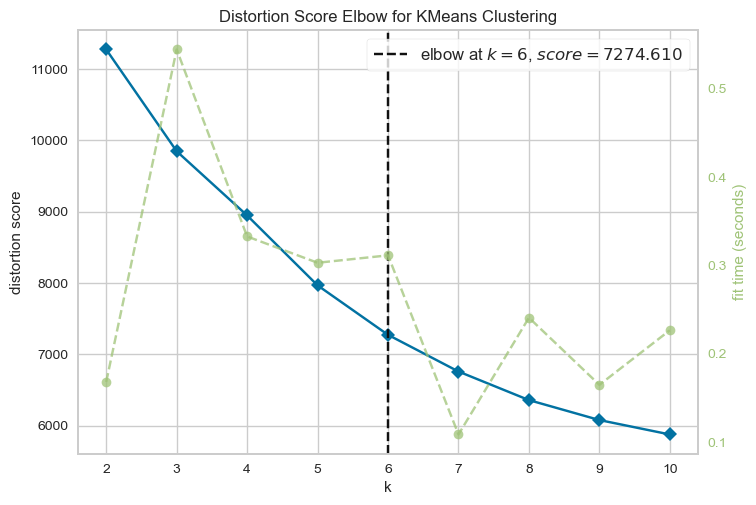

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
''' Checking for the optimal suggested clusters'''

scaler = StandardScaler()
decomp = PCA(n_components=.9) # Set below 1 for ratio, set integer to get actual number of components
cluster = KElbowVisualizer(KMeans(n_init=10))
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(df_nums)

pipe[2].show()

In [16]:
''' Creating the clusters '''

scaler = StandardScaler()
decomp = PCA(n_components=.9)
cluster = KMeans(n_init=10, n_clusters=4, random_state=42)
pipe = make_pipeline(scaler,decomp, cluster)

pipe.fit(df_nums)

kmeans_labels = pipe.steps[-1][1].labels_
df['clusters'] = kmeans_labels

In [17]:
df.columns

Index(['name', 'generation', 'type1', 'type2', 'height', 'weight', 'hp',
       'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'total', 'catch_rate',
       'base_friendship', 'base_exp', 'growth_rate', 'egg_cycles',
       'special_group', 'dual_type', 'growth_rate_Fast',
       'growth_rate_Fluctuating', 'growth_rate_Medium Fast',
       'growth_rate_Medium Slow', 'growth_rate_Slow', 'clusters'],
      dtype='object')

In [18]:
df.columns=['name', 'generation', 'type1', 'type2', 'height', 'weight', 'hp',
       'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'total', 'catch_rate',
       'base_friendship', 'base_exp', 'growth_rate', 'egg_cycles',
       'special_group', 'dual_type', 'growth_rate_Fast',
       'growth_rate_Fluctuating', 'growth_rate_Medium_Fast',
       'growth_rate_Medium_Slow', 'growth_rate_Slow', 'clusters']

In [19]:
''' Adding new columns to dataset'''

values = pipe[:2].transform(df_nums) 
pca_labels = [f"PC{idx+1}" for idx, i in enumerate(values.T)]

df = df.join(pd.DataFrame(values, columns=pca_labels))

# Reverse engineering the growth_rate column
def reverse_engineer_growth_rate(row):
    if row['growth_rate_Fast'] == 1:
        return 'Fast'
    elif row['growth_rate_Medium_Fast'] == 1:
        return 'Medium Fast'
    elif row['growth_rate_Medium_Slow'] == 1:
        return 'Medium Slow'
    elif row['growth_rate_Slow'] == 1:
        return 'Slow'
    else:
        return 'Other'

# Apply the function to each row and assign the result to a new column 'growth_rate' in the DataFrame
df['growth_rate'] = df.apply(reverse_engineer_growth_rate, axis=1)

In [20]:
df

name  generation     type1    type2  height  weight   hp  \
0        Bulbasaur           1     Grass   Poison     0.7     6.9   45   
1          Ivysaur           1     Grass   Poison     1.0    13.0   60   
2         Venusaur           1     Grass   Poison     2.0   100.0   80   
3       Charmander           1      Fire      NaN     0.6     8.5   39   
4       Charmeleon           1      Fire      NaN     1.1    19.0   58   
...            ...         ...       ...      ...     ...     ...  ...   
1020   Raging Bolt           9  Electric   Dragon     5.2   480.0  125   
1021  Iron Boulder           9      Rock  Psychic     1.5   162.5   90   
1022    Iron Crown           9     Steel  Psychic     1.6   156.0   90   
1023     Terapagos           9    Normal      NaN     0.2     6.5   90   
1024     Pecharunt           9    Poison    Ghost     0.3     0.3   88   

      attack  defense  sp_atk  sp_def  speed  total  catch_rate  \
0         49       49      65      65     45    318          45   
1         62       63      80      80     60    405          45   
2         82       83     100     100     80    525          45   
3         52       43      60      50     65    309          45   
4         64       58      80      65     80    405          45   
...      ...      ...     ...     ...    ...    ...         ...   
1020      73       91     137      89     75    590          10   
1021     120       80      68     108    124    590          10   
1022      72      100     122     108     98    590          10   
1023      65       85      65      85     60    450         255   
1024      88      160      88      88     88    600           3   

     base_friendship base_exp  growth_rate egg_cycles    special_group  \
0                 50       64  Medium Slow         20         Ordinary   
1                 50      142  Medium Slow         20         Ordinary   
2                 50      236  Medium Slow         20         Ordinary   
3                 50       62  Medium Slow         20         Ordinary   
4                 50      142  Medium Slow         20         Ordinary   
...              ...      ...          ...        ...              ...   
1020               —        —         Slow          —  Ancient Paradox   
1021               —        —         Slow          —   Future Paradox   
1022               —        —         Slow          —   Future Paradox   
1023               —        —         Slow          —        Legendary   
1024               —        —         Slow          —         Mythical   

      dual_type  growth_rate_Fast  growth_rate_Fluctuating  \
0             1                 0                        0   
1             1                 0                        0   
2             1                 0                        0   
3             0                 0                        0   
4             0                 0                        0   
...         ...               ...                      ...   
1020          1                 0                        0   
1021          1                 0                        0   
1022          1                 0                        0   
1023          0                 0                        0   
1024          1                 0                        0   

      growth_rate_Medium_Fast  growth_rate_Medium_Slow  growth_rate_Slow  \
0                           0                        1                 0   
1                           0                        1                 0   
2                           0                        1                 0   
3                           0                        1                 0   
4                           0                        1                 0   
...                       ...                      ...               ...   
1020                        0                        0                 1   
1021                        0                        0                 1   
10

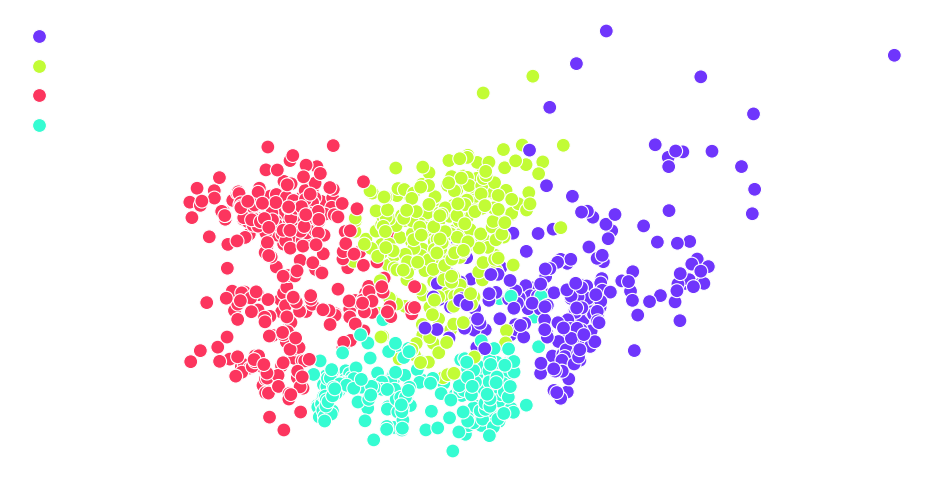

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with custom color palette
plt.figure(figsize=(10, 6))
g = sns.scatterplot(data=df, x="PC1", y="PC2", hue="clusters", alpha=1, palette={
    0: '#35fcd2',  # Cluster 0
    1: '#fc355e',  # Cluster 1
    2: '#c2fc35',  # Cluster 2
    3: '#6F35FC',  # Cluster 3
}, s=100)

# Rename legend labels
legend_labels = {
    0: 'Starters',
    1: 'Small & Weak',
    2: 'Solid Performers',
    3: 'Big & Strong'
}

# Create custom legend
handles, labels = g.get_legend_handles_labels()
reversed_handles = handles[::-1]
reversed_labels = [legend_labels[int(label)] for label in labels[::-1]]
g.legend(reversed_handles, reversed_labels, title='', loc='upper left', fontsize=15, bbox_to_anchor=(-.2, 1), labelcolor='white')

# Remove spines and ticks
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.ylabel('')
plt.xlabel('')
plt.xticks([])
plt.yticks([])

# Save the plot as a PNG image with transparent background
plt.savefig('scatterplot.png', dpi=300, transparent=True)
plt.show()


In [22]:
df.groupby(['clusters'])['defense'].size()

clusters
0    208
1    303
2    302
3    212
Name: defense, dtype: int64

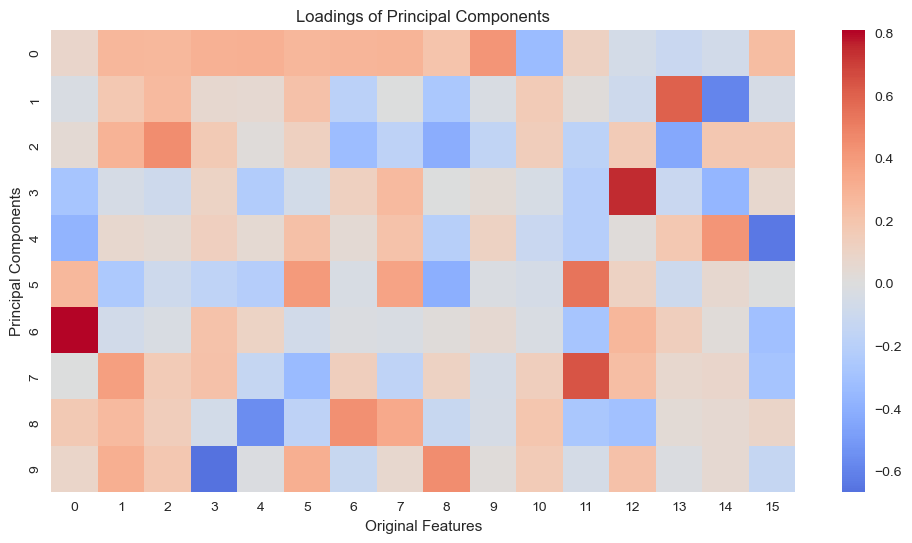

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(loadings, cmap='coolwarm', center=0)
plt.title('Loadings of Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

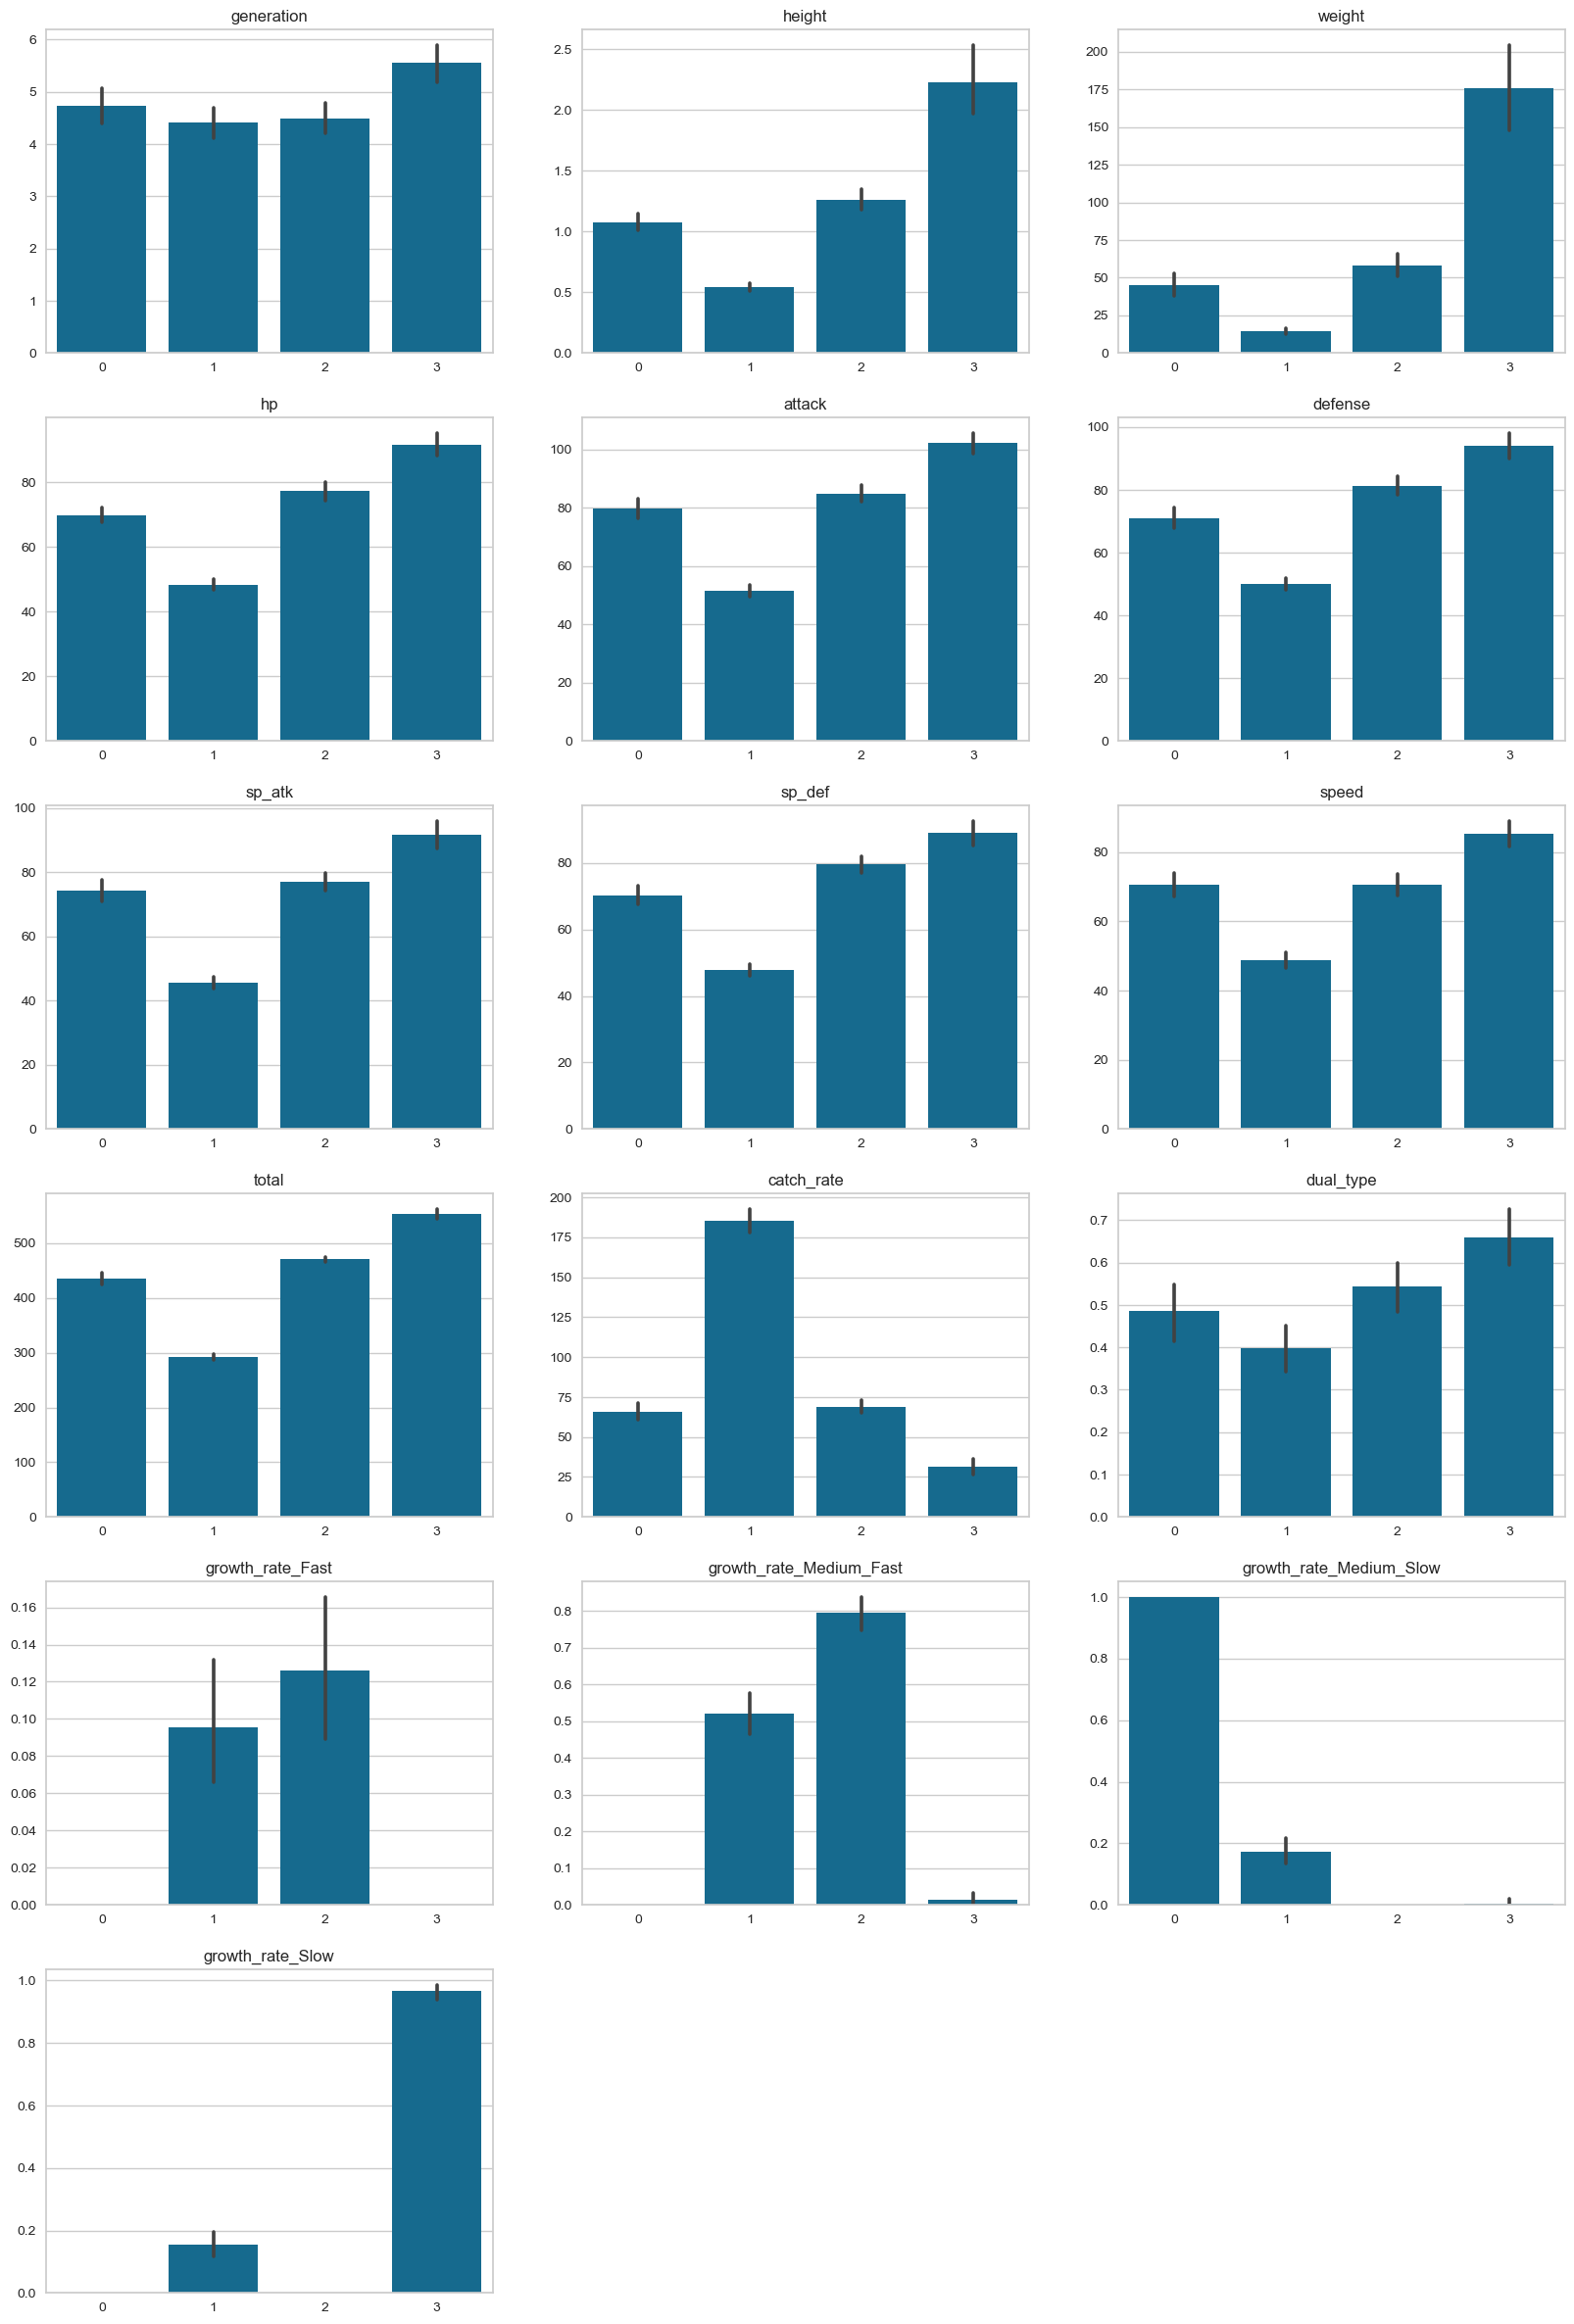

In [24]:
var_list = '''
    generation
    height
    weight
    hp
    attack
    defense
    sp_atk
    sp_def
    speed
    total
    catch_rate
    dual_type
    growth_rate_Fast
    growth_rate_Medium_Fast
    growth_rate_Medium_Slow
    growth_rate_Slow
'''.split()

rows = math.ceil(len(var_list)/3)

fig, axs = plt.subplots(rows, 3, figsize=(20,5*rows))

for i, ax in zip(var_list, axs.flat):
    g = sns.barplot(data=df, x='clusters', y=i, ax=ax)
    ax.set(xlabel='', ylabel='', title=i)

for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()
plt.show()

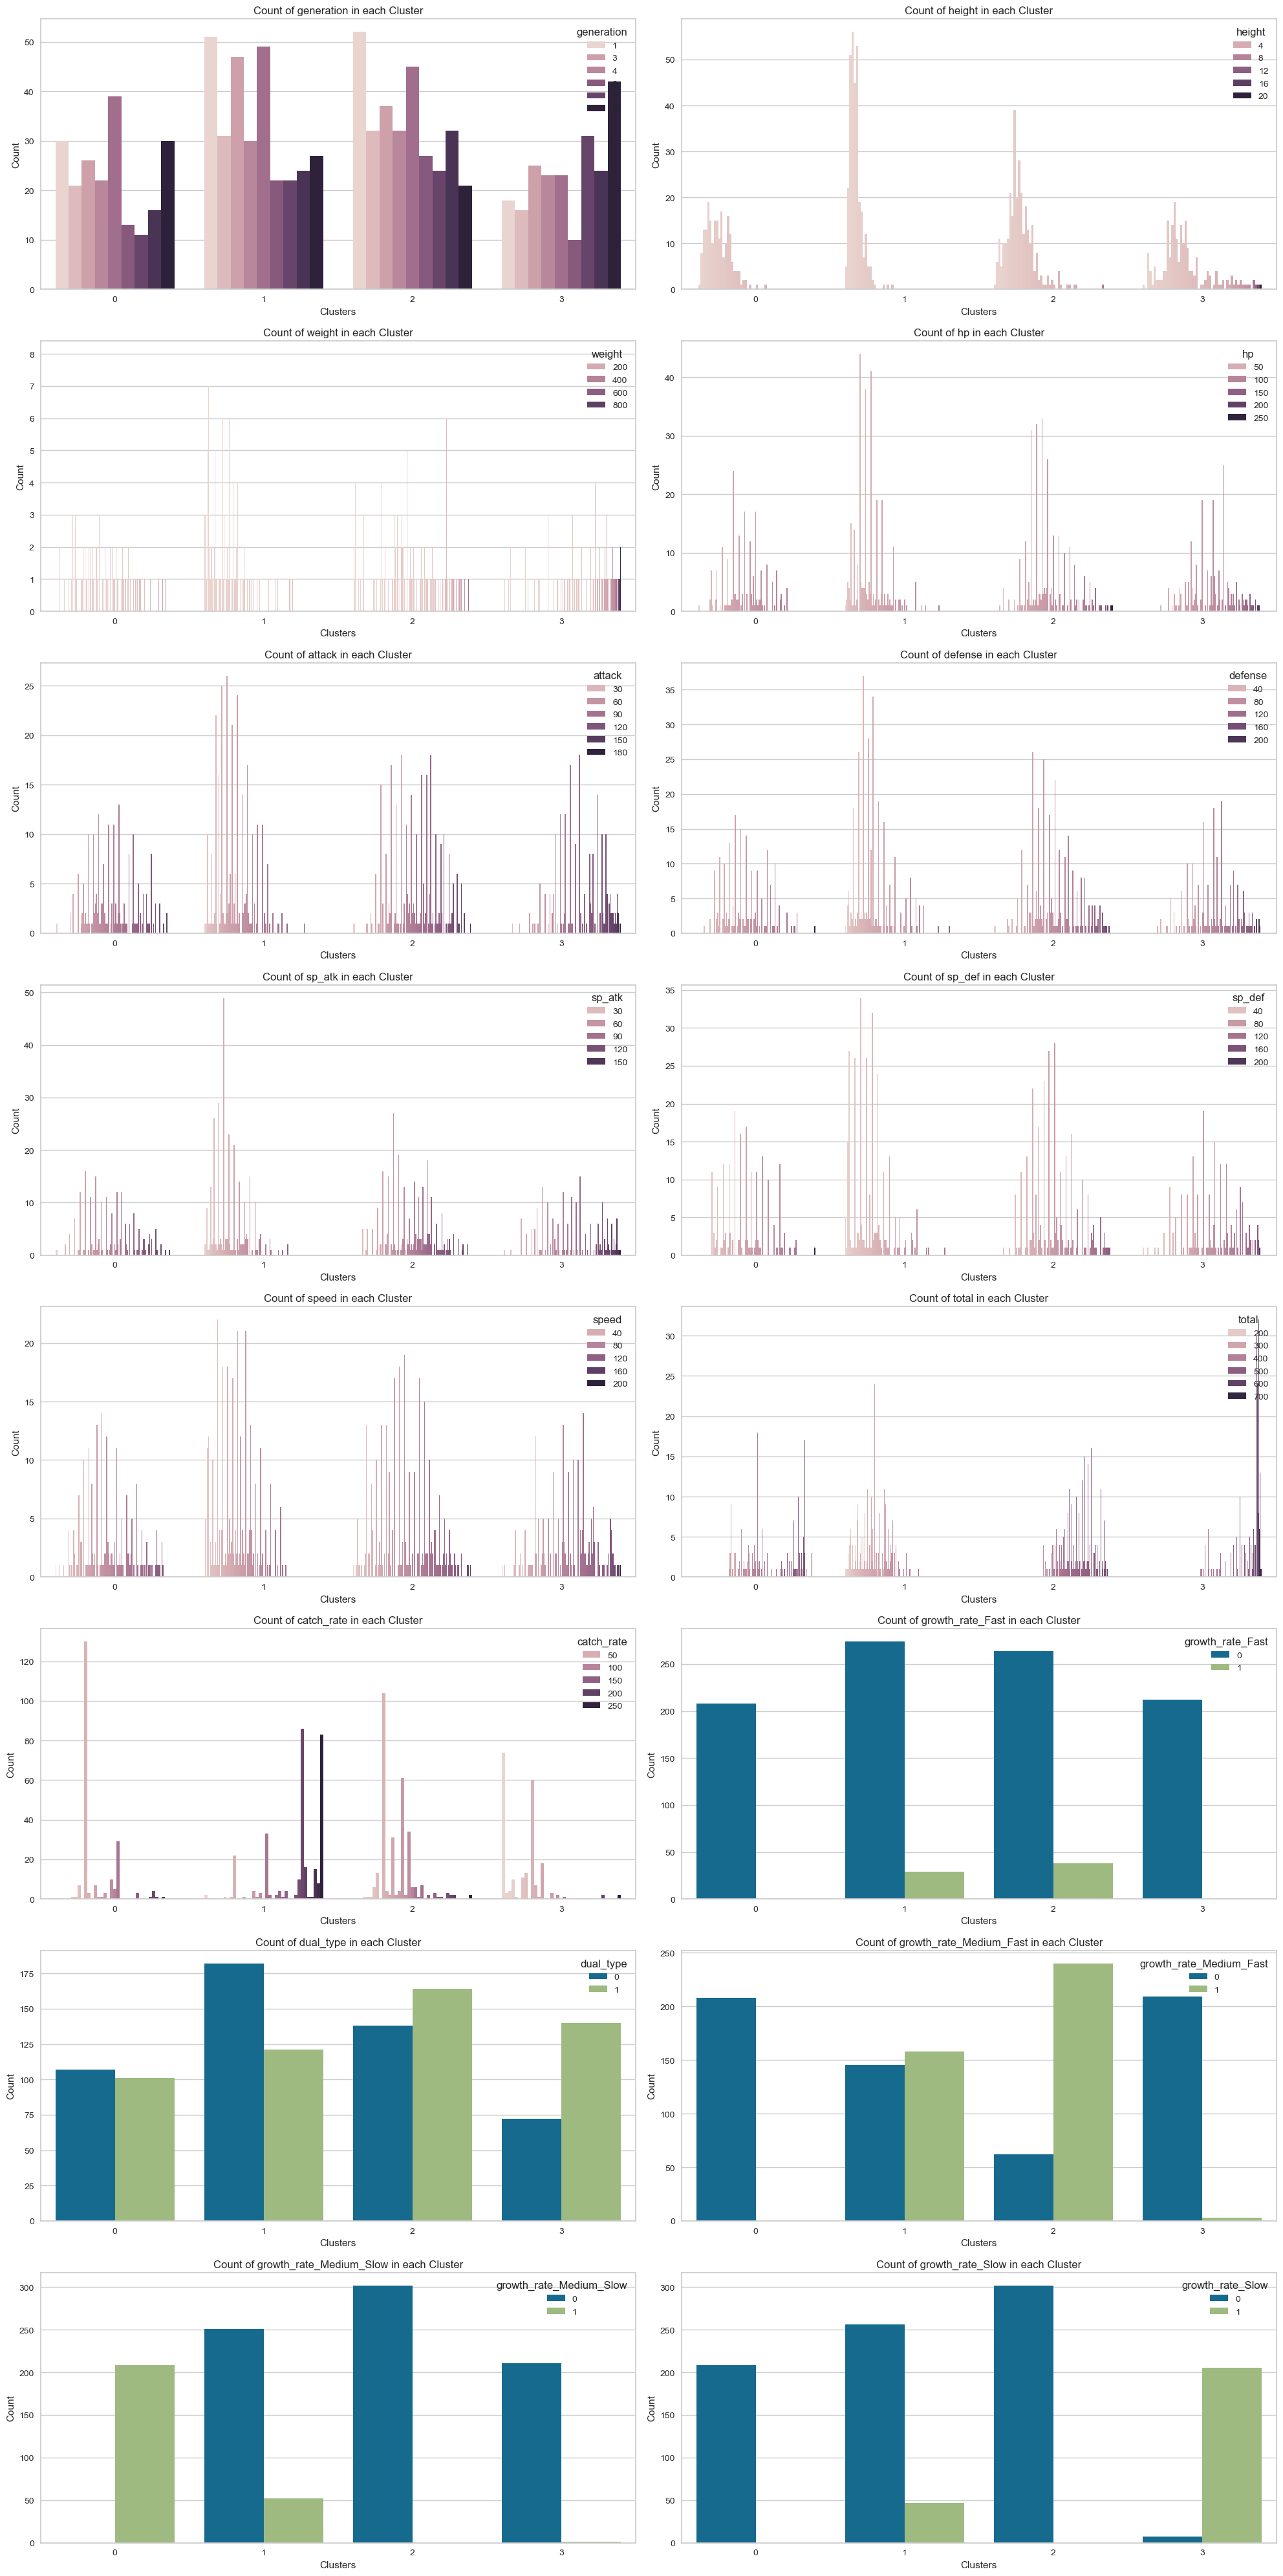

In [25]:
''' Countplots '''

var_list = ['generation', 'height', 'weight', 'hp', 'attack', 'defense',
            'sp_atk', 'sp_def', 'speed', 'total', 'catch_rate',
            'growth_rate_Fast', 'dual_type',
            'growth_rate_Medium_Fast', 'growth_rate_Medium_Slow', 'growth_rate_Slow']

rows = math.ceil(len(var_list) / 2)

fig, axs = plt.subplots(rows, 2, figsize=(20, 5 * rows))

for i, ax in zip(var_list, axs.flat):
    g = sns.countplot(data=df, x='clusters', hue=i, ax=ax)
    ax.set(xlabel='Clusters', ylabel='Count', title=f'Count of {i} in each Cluster')
    ax.legend(title=i, loc='upper right')

# Hide empty subplots
for i in axs.flat[::-1][:rows * 2 - len(var_list)]:
    i.set_axis_off()

plt.tight_layout()
plt.show()


In [26]:

# Group the DataFrame by the 'clusters' column
cluster_groups = df.groupby('clusters')

# Iterate over each cluster group
for cluster, group in cluster_groups:
    print(f"Cluster {cluster}:")
    # Iterate over each column
    for column in var_list:
        # Calculate summary statistics for the column within the cluster
        min_val = group[column].min()
        max_val = group[column].max()
        mean_val = group[column].mean()
        median_val = group[column].median()
        # Print the summary statistics
        print(f"{column}: Min={min_val}, Max={max_val}, Mean={mean_val}, Median={median_val}")
    print()  # Add empty line between clusters


Cluster 0:
generation: Min=1, Max=9, Mean=4.740384615384615, Median=5.0
height: Min=0.2, Max=3.3, Mean=1.0778846153846153, Median=1.0
weight: Min=0.1, Max=326.5, Mean=45.1235576923077, Median=28.5
hp: Min=20, Max=110, Mean=69.85096153846153, Median=70.0
attack: Min=10, Max=140, Mean=79.69711538461539, Median=77.5
defense: Min=30, Max=230, Mean=70.8173076923077, Median=65.0
sp_atk: Min=10, Max=145, Mean=74.16346153846153, Median=70.0
sp_def: Min=40, Max=230, Mean=70.27403846153847, Median=69.0
speed: Min=5, Max=126, Mean=70.66346153846153, Median=69.0
total: Min=307, Max=600, Mean=435.46634615384613, Median=422.5
catch_rate: Min=20, Max=220, Mean=65.98557692307692, Median=45.0
growth_rate_Fast: Min=0, Max=0, Mean=0.0, Median=0.0
dual_type: Min=0, Max=1, Mean=0.4855769230769231, Median=0.0
growth_rate_Medium_Fast: Min=0, Max=0, Mean=0.0, Median=0.0
growth_rate_Medium_Slow: Min=1, Max=1, Mean=1.0, Median=1.0
growth_rate_Slow: Min=0, Max=0, Mean=0.0, Median=0.0

Cluster 1:
generation: Min=

In [27]:
# Group the DataFrame by the 'clusters' column
cluster_groups = df.groupby('clusters')

# Initialize an empty list to store dictionaries of summary statistics
summary_data = []

# Iterate over each cluster group
for cluster, group in cluster_groups:
    # Initialize a dictionary to store summary statistics for the cluster
    cluster_summary = {'Cluster': cluster}
    # Iterate over each column
    for column in var_list:
        # Calculate summary statistics for the column within the cluster
        min_val = group[column].min()
        max_val = group[column].max()
        mean_val = group[column].mean()
        median_val = group[column].median()
        # Store the summary statistics in the dictionary
        cluster_summary[f'{column}_Min'] = min_val
        cluster_summary[f'{column}_Max'] = max_val
        cluster_summary[f'{column}_Mean'] = mean_val
        cluster_summary[f'{column}_Median'] = median_val
    # Append the summary statistics for the cluster to the list
    summary_data.append(cluster_summary)

# Create a DataFrame from the list of summary statistics dictionaries
summary_df = pd.DataFrame(summary_data)

# Set 'Cluster' column as the index
summary_df.set_index('Cluster', inplace=True)

# Display the DataFrame
display(summary_df)


generation_Min  generation_Max  generation_Mean  generation_Median  \
Cluster                                                                       
0                     1               9         4.740385                5.0   
1                     1               9         4.422442                4.0   
2                     1               9         4.486755                4.0   
3                     1               9         5.561321                6.0   

         height_Min  height_Max  height_Mean  height_Median  weight_Min  \
Cluster                                                                   
0               0.2         3.3     1.077885            1.0         0.1   
1               0.1         2.2     0.539934            0.5         0.1   
2               0.1         8.8     1.262914            1.2         0.3   
3               0.1        20.0     2.229717            1.8         0.1   

         weight_Max  weight_Mean  weight_Median  hp_Min  hp_Max    hp_Mean  \
Cluster                                                                      
0             326.5    45.123558          28.50      20     110  69.850962   
1             115.0    14.465347           7.80       1     115  48.379538   
2             505.0    58.160265          33.75      30     255  77.221854   
3             999.9   176.052358          95.05      43     223  91.650943   

         hp_Median  attack_Min  attack_Max  attack_Mean  attack_Median  \
Cluster                                                                  
0             70.0          10         140    79.697115           77.5   
1             45.0           5         125    51.564356           50.0   
2             70.0           5         165    84.831126           85.0   
3             90.0          29         181   102.075472          100.0   

         defense_Min  defense_Max  defense_Mean  defense_Median  sp_atk_Min  \
Cluster                                                                       
0                 30          230     70.817308            65.0          10   
1                  5          135     49.970297            47.0          10   
2                  5          184     81.284768            75.5          30   
3                 37          211     93.872642            90.0          20   

         ...  total_Median  catch_rate_Min  catch_rate_Max  catch_rate_Mean  \
Cluster  ...                                                                  
0        ...         422.5              20             220        65.985577   
1        ...         300.0               3             255       185.036304   
2        ...         478.5              10             255        69.036424   
3        ...         570.0               3             255        31.419811   

         catch_rate_Median  growth_rate_Fast_Min  growth_rate_Fast_Max  \
Cluster                                                                  
0                     45.0                     0                     0   
1                    190.0                     0                     1   
2                     60.0                     0                     1   
3                     30.0                     0                     0   

         growth_rate_Fast_Mean  growth_rate_Fast_Median  dual_type_Min  \
Cluster                                                                  
0                     0.000000                      0.0              0   
1                     0.095710                      0.0              0   
2                     0.125828                      0.0              0   
3                     0.000000                      0.0              0   

         dual_type_Max  dual_type_Mean  dual_type_Median  \
Cluster                                                    
0                    1        0.485577               0.0   
1                    1        0.399340               0.0   
2                    1        0.543046               1.0   
3                    1       

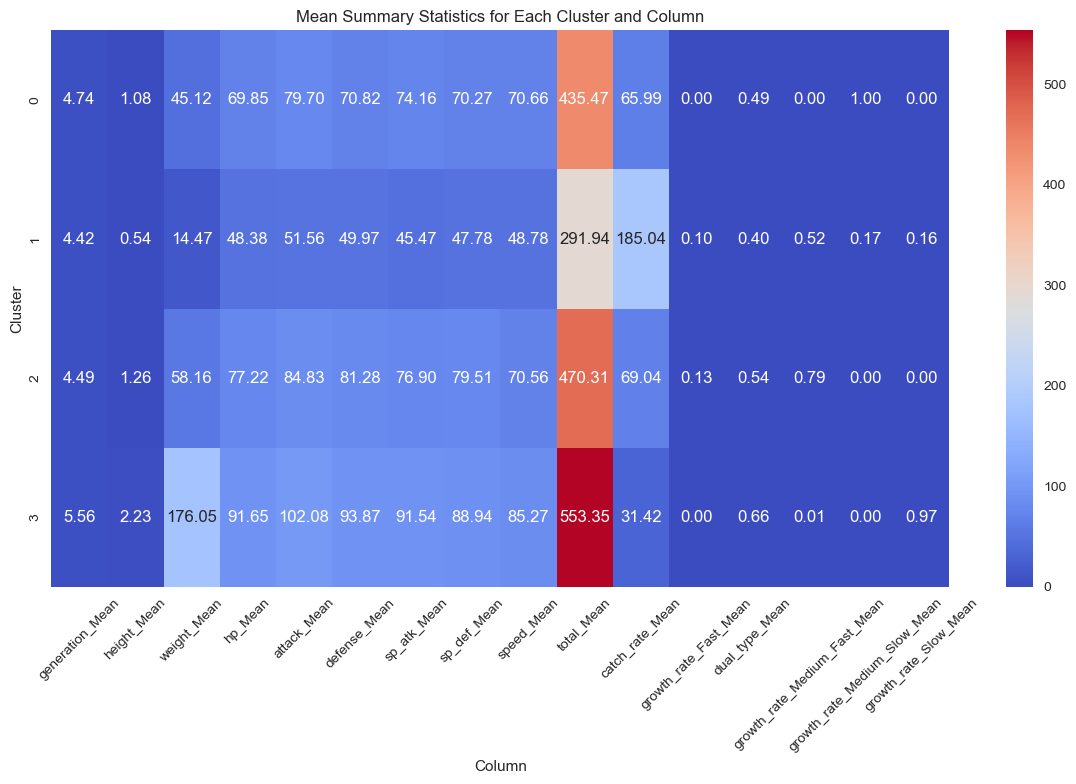

In [28]:
# Create a heatmap using mean values from summary_df
plt.figure(figsize=(12, 8))
sns.heatmap(summary_df.filter(like='_Mean'), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Mean Summary Statistics for Each Cluster and Column')
plt.xlabel('Column')
plt.ylabel('Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Cluster 0: "Balanced Performers"
Generation: Diverse (Gen 1 to 9), Average: 4.74

Height: Moderate (0.2m to 3.3m), Average: 1.08m

Weight: Moderate (0.1kg to 326.5kg), Average: 45.12kg

HP: Moderate (20 to 110), Average: 69.85

Attack: Moderate (10 to 140), Average: 79.70

Defense: Moderate (30 to 230), Average: 70.82

Special Attack: Moderate (10 to 145), Average: 74.16

Special Defense: Moderate (40 to 230), Average: 70.27

Speed: Moderate (5 to 126), Average: 70.66

Total Stats: Moderate (307 to 600), Average: 435.47

Catch Rate: Moderate (20 to 220), Average: 65.99

Dual Type: About 49% are dual types

Growth Rate: Mostly Medium Slow (100%)

These Pokémon are well-rounded with balanced stats, moderate size, and weight, and are likely versatile in various battle roles.


## Cluster 1: "Small and Weak"

Generation: Diverse (Gen 1 to 9), Average: 4.42

Height: Small (0.1m to 2.2m), Average: 0.54m

Weight: Light (0.1kg to 115kg), Average: 14.47kg

HP: Low (1 to 115), Average: 48.38

Attack: Low (5 to 125), Average: 51.56

Defense: Low (5 to 135), Average: 49.97

Special Attack: Low (10 to 105), Average: 45.47

Special Defense: Low (20 to 120), Average: 47.78

Speed: Low (10 to 100), Average: 48.78

Total Stats: Low (175 to 450), Average: 291.94

Catch Rate: High (3 to 255), Average: 185.04

Dual Type: About 40% are dual types

Growth Rate: Mix of Fast (9.6%) and Medium Fast (52.1%)

These Pokémon are generally smaller and lighter with lower overall stats. They tend to be easier to catch and are often single type.


## Cluster 2: "Moderate Performers"

Generation: Diverse (Gen 1 to 9), Average: 4.49

Height: Moderate (0.1m to 8.8m), Average: 1.26m

Weight: Moderate (0.3kg to 505kg), Average: 58.16kg

HP: Moderate (30 to 255), Average: 77.22

Attack: Moderate (5 to 165), Average: 84.83

Defense: Moderate (5 to 184), Average: 81.28

Special Attack: Moderate (30 to 145), Average: 76.90

Special Defense: Moderate (35 to 154), Average: 79.51

Speed: Moderate (5 to 160), Average: 70.56

Total Stats: Moderate (355 to 600), Average: 470.31

Catch Rate: Moderate (10 to 255), Average: 69.04

Dual Type: About 54% are dual types

Growth Rate: Mostly Medium Fast (79.5%)

These Pokémon have moderate stats and a mix of sizes and weights. They are more versatile and balanced, fitting into a variety of roles in battles.


## Cluster 3: "Powerful and Rare"

Generation: Diverse (Gen 1 to 9), Average: 5.56

Height: Large (0.1m to 20m), Average: 2.23m

Weight: Heavy (0.1kg to 999.9kg), Average: 176.05kg

HP: High (43 to 223), Average: 91.65

Attack: High (29 to 181), Average: 102.08

Defense: High (37 to 211), Average: 93.87

Special Attack: High (20 to 173), Average: 91.54

Special Defense: High (20 to 200), Average: 88.94

Speed: High (5 to 200), Average: 85.27

Total Stats: High (385 to 720), Average: 553.35

Catch Rate: Low (3 to 255), Average: 31.42

Dual Type: About 66% are dual types

Growth Rate: Mostly Slow (97%)

These Pokémon are characterized by their large size, heavy weight, and high stats across the board. They are often harder to catch and have dual types, making them versatile and powerful in battles.


Summary of Changes
Cluster 0: Remains relatively similar to the previous balanced cluster but now likely includes more Pokémon from the previously split balanced clusters.
Cluster 1: Combines previous clusters of smaller, weaker Pokémon, emphasizing their lower stats and higher catch rates.
Cluster 2: Merges moderate performers from previous clusters, indicating a mix of sizes and weights with moderate stats.
Cluster 3: Consolidates powerful and rare Pokémon, highlighting their high stats, large sizes, and lower catch rates.
By reducing the number of clusters, some of the previous clusters have been combined, leading to broader categories that still maintain their core characteristics but with increased diversity within each cluster.

In [29]:
# Calculate the count of each 'type1' category within each cluster
type_count = df.groupby(['type1', 'clusters']).size().unstack(fill_value=0)

# Calculate the count of each cluster within each 'type1' category
cluster_count = df.groupby(['clusters', 'type1']).size().unstack(fill_value=0)

# Normalize the counts to percentages
type_percent = type_count.div(type_count.sum(axis=1), axis=0) * 100
cluster_percent = cluster_count.div(cluster_count.sum(axis=1), axis=0) * 100
cluster_percent = cluster_percent.T
# Plotting the distribution of types across clusters using a heatmap
plt.figure(figsize=(8, 15))

# Plotting the distribution of types across clusters using a heatmap
plt.figure(figsize=(16, 8))

# Plotting the distribution of 'type1' categories across clusters
plt.subplot(1, 2, 1)
sns.heatmap(type_percent, cmap='Reds', annot=True, fmt='.1f', cbar=True)
plt.title('Percentage Distribution of Type1 Categories across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Primary Type')
plt.xticks(rotation=45)

# Plotting the distribution of clusters across 'type1' categories
plt.subplot(1, 2, 2)
sns.heatmap(cluster_percent, cmap='Blues', annot=True, fmt='.1f', cbar=True)
plt.title('Percentage Distribution of Clusters across Type1 Categories')
plt.xlabel('Cluster')
plt.ylabel('Primary Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 800x1500 with 0 Axes>

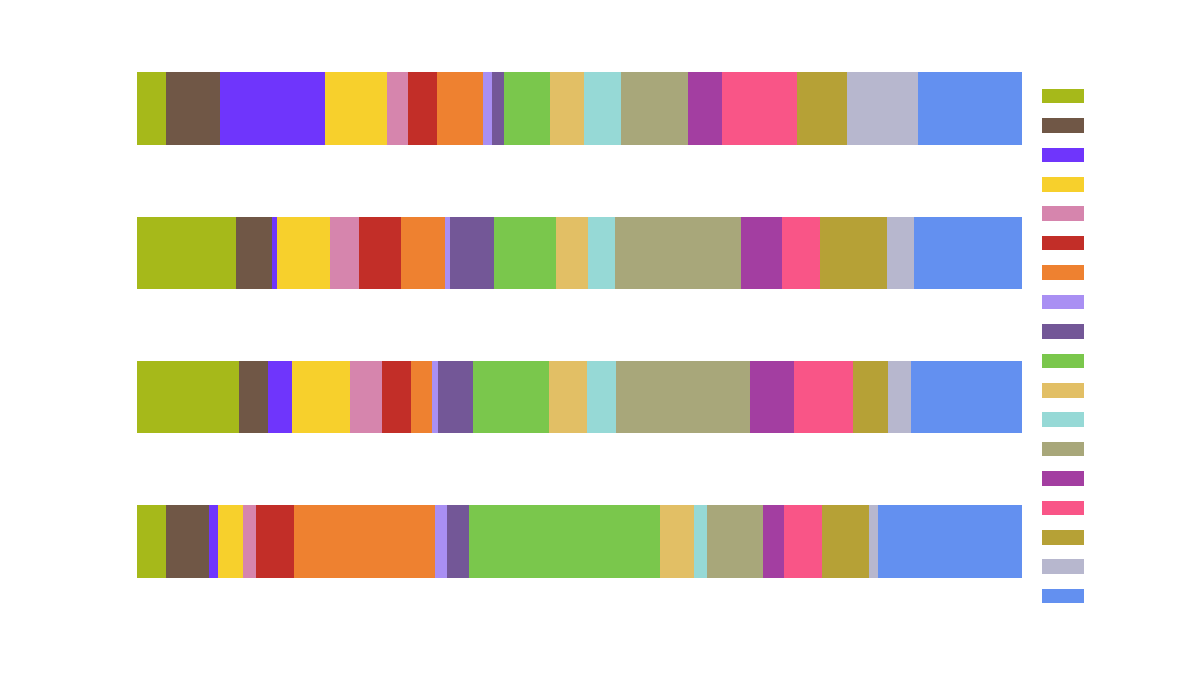

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df and clusters are already defined as in your previous steps

# Group by 'clusters' and 'type1' to get the count of each cluster in each type
cluster_count = df.groupby(['clusters', 'type1']).size().unstack(fill_value=0)
cluster_percent = cluster_count.div(cluster_count.sum(axis=1), axis=0) * 100
# Define the color mapping
color_mapping = {
    'Normal': '#A8A77A',
    'Fire': '#EE8130',
    'Water': '#6390F0',
    'Electric': '#F7D02C',
    'Grass': '#7AC74C',
    'Ice': '#96D9D6',
    'Fighting': '#C22E28',
    'Poison': '#A33EA1',
    'Ground': '#E2BF65',
    'Flying': '#A98FF3',
    'Psychic': '#F95587',
    'Bug': '#A6B91A',
    'Rock': '#B6A136',
    'Ghost': '#735797',
    'Dragon': '#6F35FC',
    'Dark': '#705746',
    'Steel': '#B7B7CE',
    'Fairy': '#D685AD'
}

# Apply the color mapping to the columns
colors = [color_mapping[col] for col in cluster_count.columns]

# Custom cluster names
clusters = ['Starters', 'Small & \nWeak', 'Solid \nPerformers', 'Big & \nStrong']

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 7.5))
cluster_percent.plot(kind='barh', stacked=True, color=colors, ax=ax)

# Customize the plot
plt.title('Pokémon Types in Each Cluster', fontsize=18, color='white')
plt.xlabel('Percentage', fontsize=17, color='white')
plt.ylabel('')
ax.set_yticklabels(clusters, fontsize=17, color='white')
plt.legend(title='Primary Type', bbox_to_anchor=(0.95, 1), loc='upper left', fontsize=15, title_fontsize=17)

# Despine and remove gridlines
sns.despine(left=True, bottom=True)
ax.grid(False)

# Change tick params to white
ax.tick_params(axis='x', colors='white', which='both')
ax.tick_params(axis='y', colors='white', which='both')

# Change legend text to white
for text in ax.get_legend().get_texts():
    text.set_color('white')
ax.get_legend().get_title().set_color('white')

# Save the figure with a transparent background
plt.savefig('bar_pokemon_clusters.png', transparent=True, dpi=300)

# Show the plot
plt.show()


In [31]:
type_percent

clusters          0          1          2          3
type1                                               
Bug        8.433735  42.168675  40.963855   8.433735
Dark      22.222222  22.222222  26.666667  28.888889
Dragon     5.405405  21.621622   5.405405  67.567568
Electric  10.169492  33.898305  30.508475  25.423729
Fairy     10.344828  37.931034  34.482759  17.241379
Fighting  22.500000  25.000000  35.000000  17.500000
Fire      50.000000  10.606061  22.727273  16.666667
Flying    33.333333  22.222222  22.222222  22.222222
Ghost     14.285714  34.285714  42.857143   8.571429
Grass     43.689320  25.242718  20.388350  10.679612
Ground    20.000000  32.500000  27.500000  20.000000
Ice        9.677419  32.258065  29.032258  29.032258
Normal    11.016949  38.983051  36.440678  13.559322
Poison    11.904762  35.714286  33.333333  19.047619
Psychic   15.000000  33.333333  21.666667  30.000000
Rock      18.965517  20.689655  39.655172  20.689655
Steel      5.555556  22.222222  25.000000  47.222222
Water     25.373134  28.358209  27.611940  18.656716

In [32]:
'''
    cluster0 = 6F35FC
    cluster1 = A6B91A
    cluster2 = A8A77A
    cluster3 = D685AD
    cluster4 = C22E28
    '''

'\n    cluster0 = 6F35FC\n    cluster1 = A6B91A\n    cluster2 = A8A77A\n    cluster3 = D685AD\n    cluster4 = C22E28\n    '

In [33]:
df.growth_rate.unique()

array(['Medium Slow', 'Medium Fast', 'Fast', 'Slow', 'Other'],
      dtype=object)

Cluster 0:


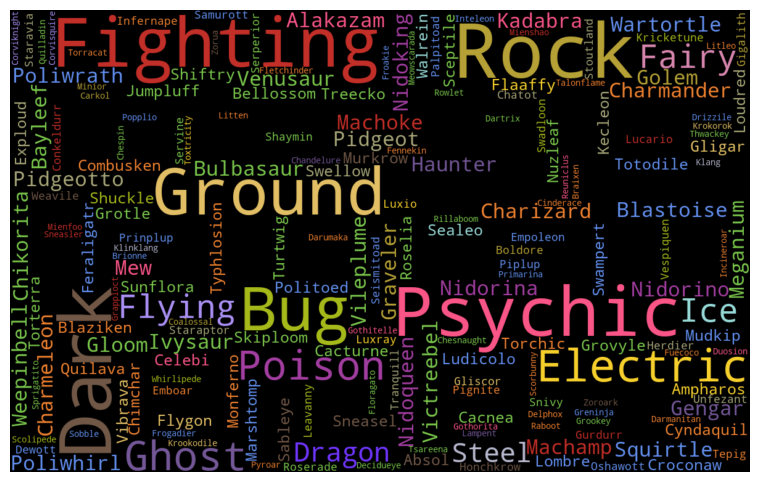

Cluster 1:


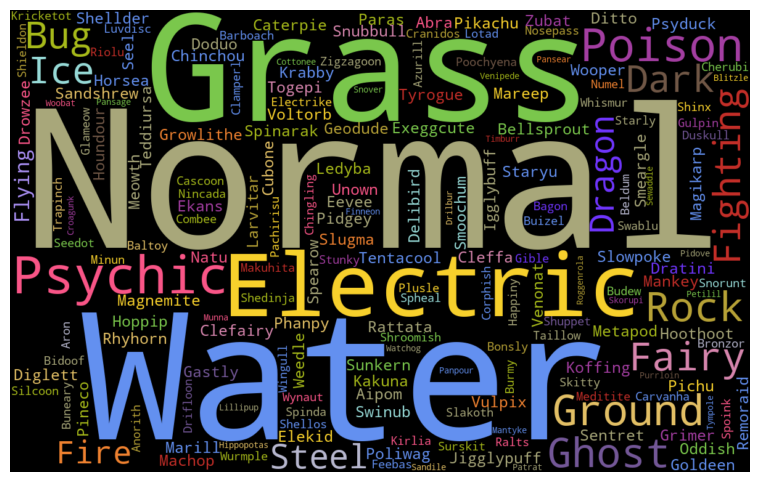

Cluster 2:


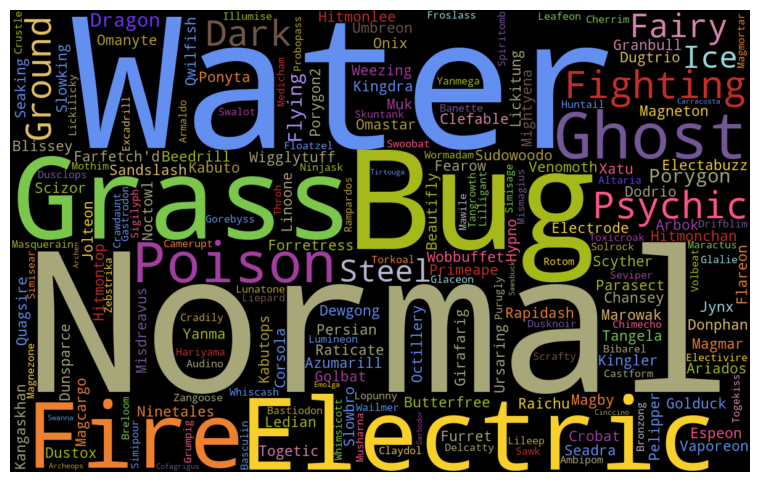

Cluster 3:


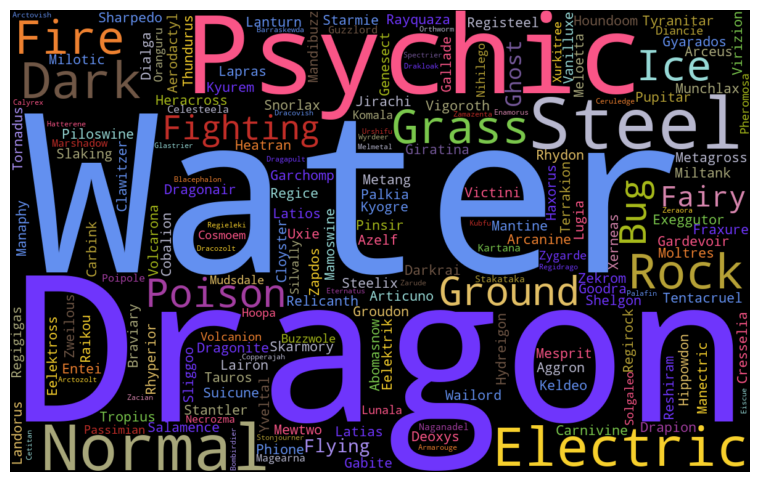

In [34]:
''' Generate wordclouds for each cluster '''

# Define a custom color palette with colors for each type
custom_palette = {
    'Normal': '#A8A77A',
    'Fire': '#EE8130',
    'Water': '#6390F0',
    'Electric': '#F7D02C',
    'Grass': '#7AC74C',
    'Ice': '#96D9D6',
    'Fighting': '#C22E28',
    'Poison': '#A33EA1',
    'Ground': '#E2BF65',
    'Flying': '#A98FF3',
    'Psychic': '#F95587',
    'Bug': '#A6B91A',
    'Rock': '#B6A136',
    'Ghost': '#735797',
    'Dragon': '#6F35FC',
    'Dark': '#705746',
    'Steel': '#B7B7CE',
    'Fairy': '#D685AD'
}

# Function to generate word cloud for each cluster with custom type-based coloring
def generate_wordcloud_with_custom_colors_and_names(cluster):
    # Concatenate all names and typings within the cluster
    text = ' '.join(cluster['name']) + ' '.join(cluster['type1'])
    
    # Create a function to assign color to each word based on its type or name
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if word in cluster['type1'].values:
            return custom_palette.get(word, 'black')
        elif word in cluster['name'].values:
            # Assign color based on the type of the Pokémon
            pokemon_type = cluster.loc[cluster['name'] == word, 'type1'].values[0]
            return custom_palette.get(pokemon_type, 'black')
        else:
            return 'black'
    
    # Generate word cloud with custom type-based coloring
    wordcloud = WordCloud(width=1200, height=750, background_color=None, color_func=color_func).generate(text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('')
    plt.axis('off')
    plt.show()

# Iterate over each cluster and generate word cloud with custom type-based coloring and names
for cluster, group in df.groupby('clusters'):
    print(f"Cluster {cluster}:")
    generate_wordcloud_with_custom_colors_and_names(group)


Cluster 0:


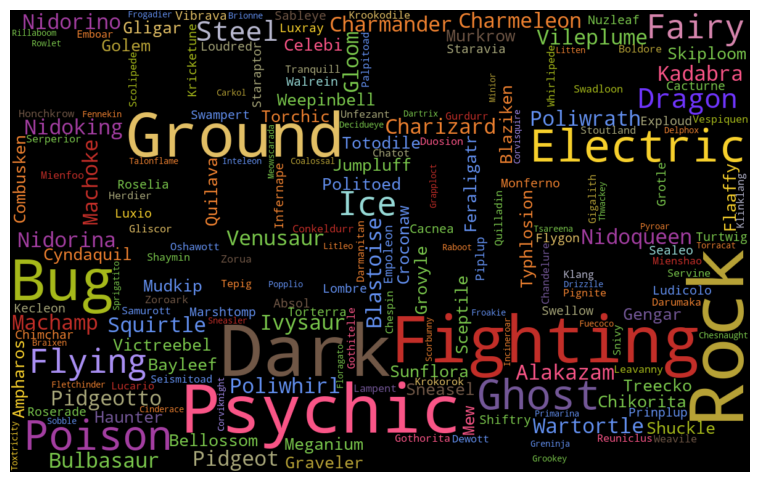

Cluster 1:


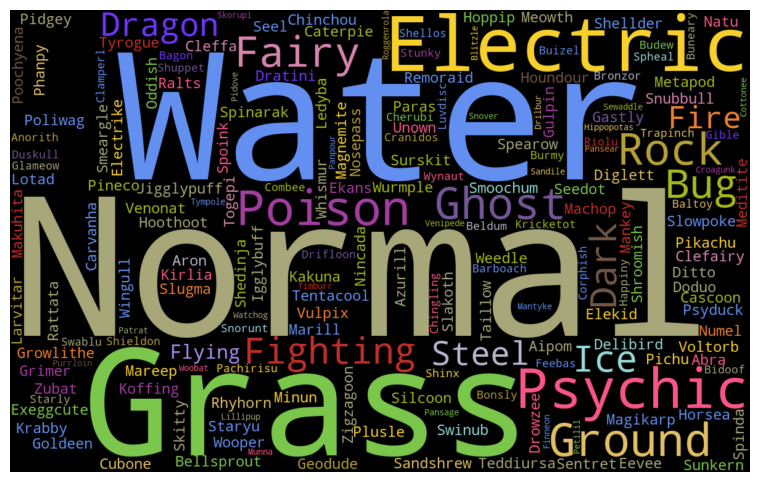

Cluster 2:


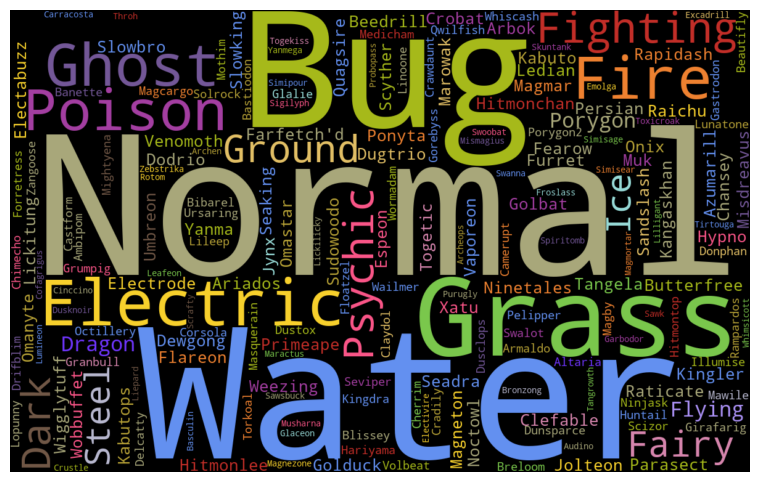

Cluster 3:


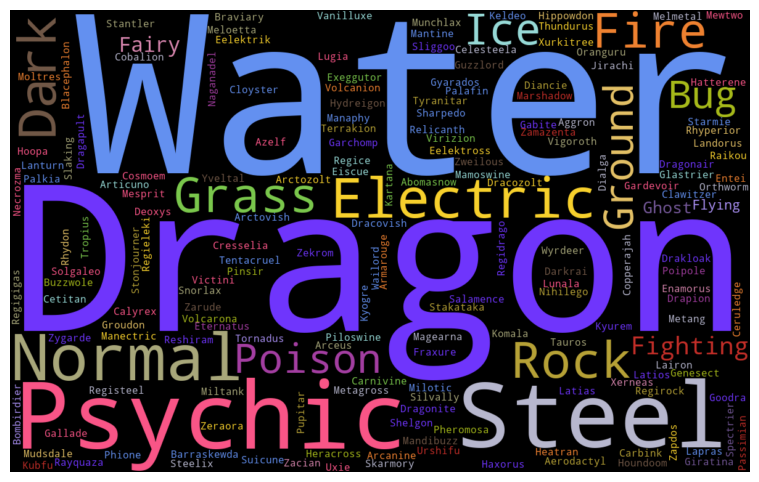

In [35]:
# Function to generate word cloud for each cluster with custom type-based coloring
def generate_wordcloud_with_custom_colors_and_names(cluster, filename):
    # Concatenate all names and typings within the cluster
    text = ' '.join(cluster['name']) + ' '.join(cluster['type1'])
    
    # Create a function to assign color to each word based on its type or name
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        if word in cluster['type1'].values:
            return custom_palette.get(word, 'black')
        elif word in cluster['name'].values:
            # Assign color based on the type of the Pokémon
            pokemon_type = cluster.loc[cluster['name'] == word, 'type1'].values[0]
            return custom_palette.get(pokemon_type, 'black')
        else:
            return 'black'
    
    # Generate word cloud with custom type-based coloring
    wordcloud = WordCloud(width=1200, height=750, background_color=None, color_func=color_func).generate(text)
    
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('')
    plt.axis('off')
    
    # Save the word cloud as PNG image with transparent background and 300 dpi
    plt.savefig(filename, dpi=300, transparent=True)
    
    # Show the plot (optional)
    plt.show()

# Iterate over each cluster and generate word cloud with custom type-based coloring and names
for cluster, group in df.groupby('clusters'):
    print(f"Cluster {cluster}:")
    filename = f"wordcloud_cluster_{cluster}.png"  # Define custom filename
    generate_wordcloud_with_custom_colors_and_names(group, filename)


In [36]:
import scipy.stats as stats

# Significance level
alpha = 0.05

# Perform t-tests for height and weight between Cluster 3 and each other cluster
clusters_to_compare = [0, 1, 2, 4]
p_values_height = {}
p_values_weight = {}

for cluster in clusters_to_compare:
    # Perform t-test for height
    _, p_height = stats.ttest_ind(df[df['clusters'] == 3]['height'], df[df['clusters'] == cluster]['height'])
    p_values_height[cluster] = p_height
    
    # Perform t-test for weight
    _, p_weight = stats.ttest_ind(df[df['clusters'] == 3]['weight'], df[df['clusters'] == cluster]['weight'])
    p_values_weight[cluster] = p_weight

# Adjust p-values for multiple comparisons using Bonferroni correction
adjusted_p_values_height = {cluster: p_value * len(clusters_to_compare) for cluster, p_value in p_values_height.items()}
adjusted_p_values_weight = {cluster: p_value * len(clusters_to_compare) for cluster, p_value in p_values_weight.items()}

# Print adjusted p-values
print("Adjusted p-values for height:")
print(adjusted_p_values_height)
print("\nAdjusted p-values for weight:")
print(adjusted_p_values_weight)


Adjusted p-values for height:
{0: 1.4761246741012449e-12, 1: 3.103349184379927e-35, 2: 8.814140762833107e-12, 4: nan}

Adjusted p-values for weight:
{0: 6.203308040393283e-16, 1: 1.3100011820106656e-33, 2: 1.3407764568987469e-17, 4: nan}


In [37]:
# df.loc[df['clusters']==2]

In [38]:
# Count the number of dual-type Pokémon in each cluster
dual_type_counts = df.groupby('clusters').apply(lambda x: x['type2'].notna().sum())

# Count the total number of Pokémon in each cluster
total_counts = df['clusters'].value_counts().sort_index()

# Calculate the proportion of dual-type Pokémon in each cluster
dual_type_proportion = dual_type_counts / total_counts

# Print the results
for cluster in dual_type_proportion.index:
    print(f"Cluster {cluster}:")
    print(f"  Dual-type Pokémon: {dual_type_counts[cluster]}")
    print(f"  Total Pokémon: {total_counts[cluster]}")
    print(f"  Proportion of Dual-type Pokémon: {dual_type_proportion[cluster]:.2f}")


Cluster 0:
  Dual-type Pokémon: 101
  Total Pokémon: 208
  Proportion of Dual-type Pokémon: 0.49
Cluster 1:
  Dual-type Pokémon: 121
  Total Pokémon: 303
  Proportion of Dual-type Pokémon: 0.40
Cluster 2:
  Dual-type Pokémon: 164
  Total Pokémon: 302
  Proportion of Dual-type Pokémon: 0.54
Cluster 3:
  Dual-type Pokémon: 140
  Total Pokémon: 212
  Proportion of Dual-type Pokémon: 0.66


/var/folders/tt/x151c7ld2dqg4b6z61n1bshh0000gn/T/ipykernel_93929/3079750817.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dual_type_counts = df.groupby('clusters').apply(lambda x: x['type2'].notna().sum())


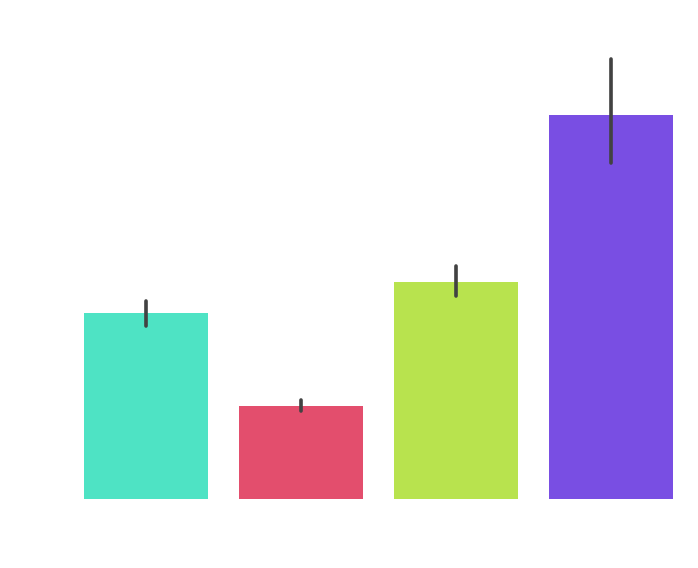

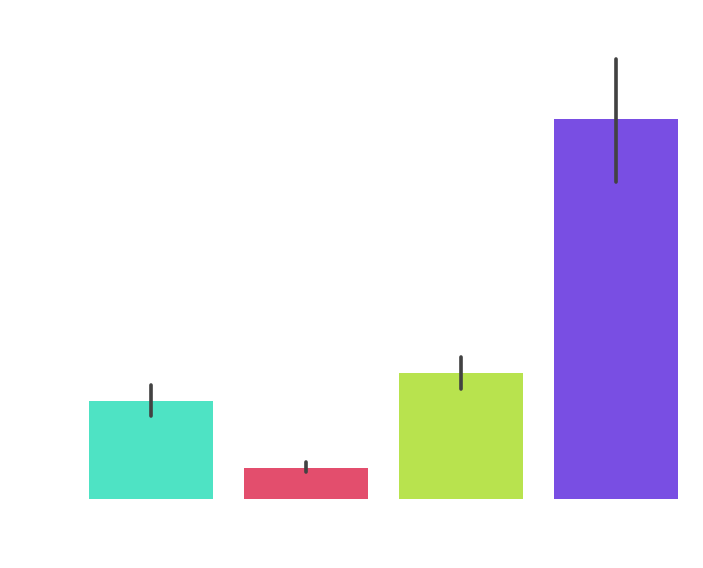

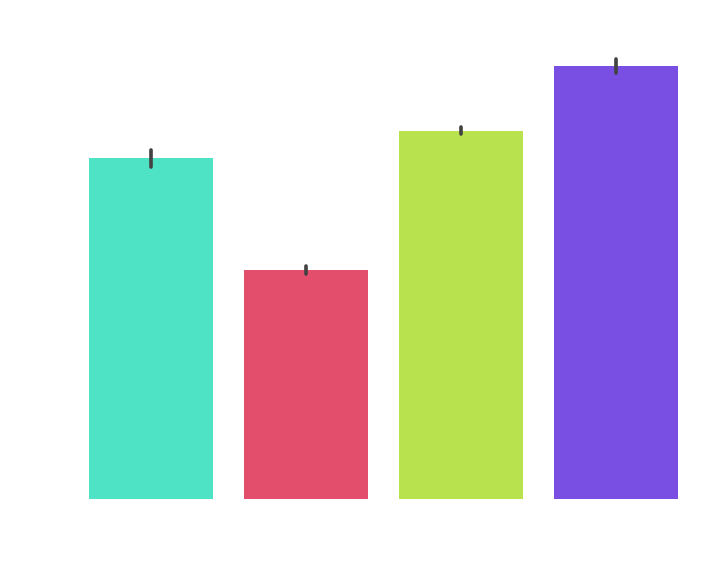

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the attributes to loop through
attributes = ['height', 'weight', 'total']

# Define the color mapping
color_mapping = {
    0: '#35fcd2',  # Cluster 0
    1: '#fc355e',  # Cluster 1
    2: '#c2fc35',  # Cluster 2
    3: '#6F35FC',  # Cluster 3
}

# Define cluster names for x-axis ticks
cluster_names = ['Starters', 'Small & \nWeak', 'Solid \nPerformers', 'Big & \nStrong']

# Loop through each attribute
for attr in attributes:
    # Create a new figure
    plt.figure(figsize=(8, 6))
    
    # Create the bar plot with specified colors
    sns.barplot(data=df, x='clusters', y=attr, hue='clusters', palette=color_mapping)
    
    # Customize plot
    plt.title(f'Average {attr.capitalize()} by Cluster', fontsize=19, color='white')
    plt.xlabel('', fontsize=14, color='white')
    plt.ylabel(f'Average {attr.capitalize()}', fontsize=14, color='white')
    plt.xticks(range(4), cluster_names, fontsize=17, color='white')
    plt.yticks(fontsize=13, color='white')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.grid(False)
    
    # Remove the legend
    plt.legend([], [], frameon=False)
    
    # Save the plot as PNG image with transparent background and 300 dpi
    plt.savefig(f'{attr}_bar_chart.png', dpi=300, transparent=True)
    
    # Show the plot (optional)
    plt.show()


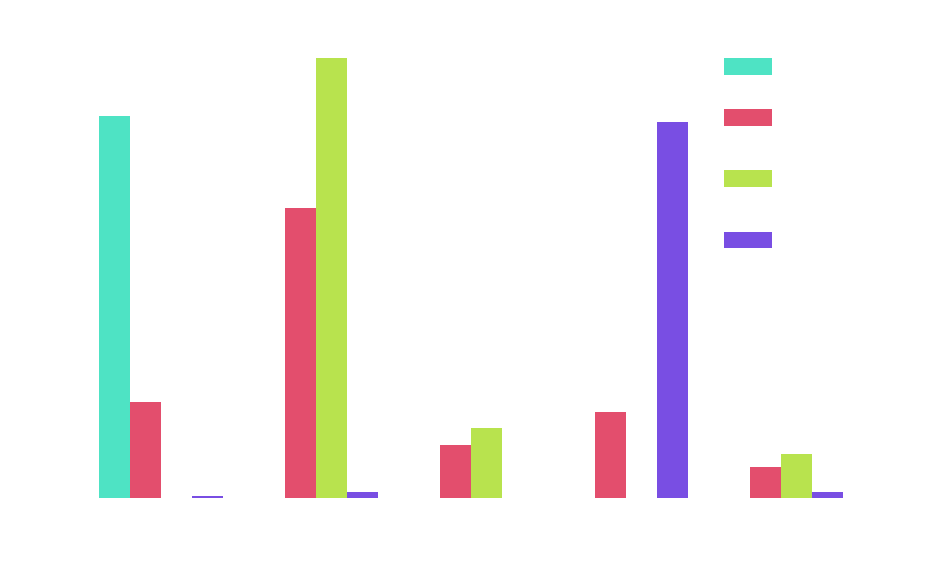

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with a 'clusters' column and a 'growth_rate' column containing the 5 unique growth rate categories

# Create a count plot to visualize the distribution of growth rate categories across clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='growth_rate', hue='clusters', palette=color_mapping)

# Customize the plot
plt.title('Distribution of Growth Rate Across Clusters', fontsize=18, color='white')
plt.xlabel('Growth Rate', fontsize=17, color='white')
plt.ylabel('Count', fontsize=17, color='white')
plt.xticks(fontsize=15, color='white')
plt.yticks(fontsize=15, color='white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(False)

# Add custom legend with cluster names
cluster_names = ['Starters', 'Small & \nWeak', 'Solid \nPerformers', 'Big & \nStrong']
legend_labels = {
    0: cluster_names[0],
    1: cluster_names[1],
    2: cluster_names[2],
    3: cluster_names[3]
}
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [legend_labels[int(label)] for label in labels], title='', fontsize=17, labelcolor='white', bbox_to_anchor=(0.8,1))
plt.savefig('growth_bar_chart.png', dpi=300, transparent=True)
plt.show()


In [41]:
df.growth_rate.unique()

array(['Medium Slow', 'Medium Fast', 'Fast', 'Slow', 'Other'],
      dtype=object)

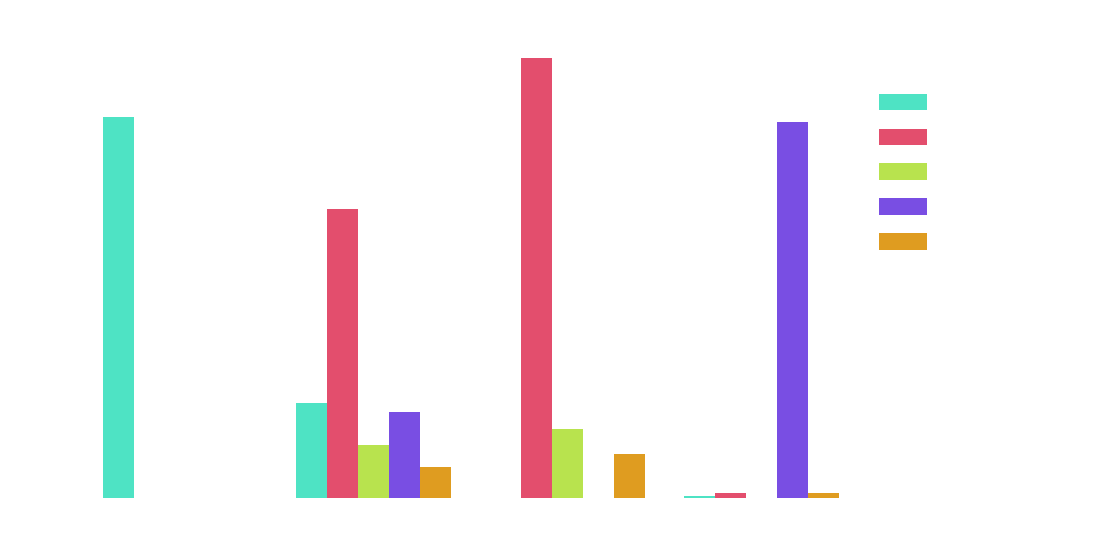

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color mapping
color_mapping = ['#35fcd2', '#fc355e', '#c2fc35', '#6F35FC', '#FFA500']  # Added #FFA500 for the fifth category

# Assuming you have a DataFrame named df with a 'clusters' column and a 'growth_rate' column containing the 5 unique growth rate categories

# Create a count plot to visualize the distribution of growth rate categories across clusters
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='clusters', hue='growth_rate', palette=color_mapping)

# Customize the plot
plt.title('Distribution of Growth Rate Across Clusters', fontsize=18, color='white')
plt.xlabel('', fontsize=17, color='white')
plt.ylabel('Count', fontsize=17, color='white')
plt.xticks(fontsize=15, color='white')
plt.yticks(fontsize=15, color='white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(False)

# Adjust cluster labels on the x-axis
cluster_names = ['Starters', 'Small & \nWeak', 'Solid \nPerformers', 'Big & \nStrong']
plt.xticks(ticks=range(len(cluster_names)), labels=cluster_names)

# Create a custom legend with properly named growth rates
growth_rate_names = ['Medium Slow', 'Medium Fast', 'Fast', 'Slow', 'Other']
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, growth_rate_names, title='Growth Rate', fontsize=17, labelcolor='white', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust legend title and labels
plt.gca().get_legend().get_title().set_fontsize(17)
plt.gca().get_legend().get_title().set_color('white')

# Save the plot with a transparent background
plt.savefig('growth_bar_chart.png', dpi=300, transparent=True,bbox_inches='tight')
plt.show()


In [43]:
df.columns

Index(['name', 'generation', 'type1', 'type2', 'height', 'weight', 'hp',
       'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'total', 'catch_rate',
       'base_friendship', 'base_exp', 'growth_rate', 'egg_cycles',
       'special_group', 'dual_type', 'growth_rate_Fast',
       'growth_rate_Fluctuating', 'growth_rate_Medium_Fast',
       'growth_rate_Medium_Slow', 'growth_rate_Slow', 'clusters', 'PC1', 'PC2',
       'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'],
      dtype='object')

In [44]:
import matplotlib.pyplot as plt

def clean_stat_name(stat_name):
    # Remove underscores and capitalize the first letter of each word
    cleaned_name = ' '.join(stat_name.split('_')).title()
    return cleaned_name

def plot_pokemon_stats(df, pokemon_name):
    # Extract the row corresponding to the specific Pokémon
    pokemon_row = df[df['name'] == pokemon_name]

    # Extract the relevant stats columns
    stats_columns = ['attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'hp']
    pokemon_stats = pokemon_row[stats_columns]

    # Transpose the DataFrame
    pokemon_stats_transposed = pokemon_stats.T

    # Plot a bar chart
    plt.figure(figsize=(10, 6))
    pokemon_stats_transposed.plot(kind='bar', legend=False, color='#35fcd2')

    # Customize the plot
    plt.title('', fontsize=16, color='white')
    plt.xlabel('Stat', fontsize=14, color='white')
    plt.ylabel('Value', fontsize=14, color='white')
    plt.xticks(range(len(stats_columns)), [clean_stat_name(stat) for stat in stats_columns], rotation=45, fontsize=12, color='white')
    plt.yticks(fontsize=12, color='white')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.grid(False)
    plt.tight_layout()

    # Save the plot as PNG image with transparent background and 300 dpi
    plt.savefig(f'{pokemon_name}_stats.png', dpi=300, transparent=True)

    plt.show()


<Figure size 1000x600 with 0 Axes>

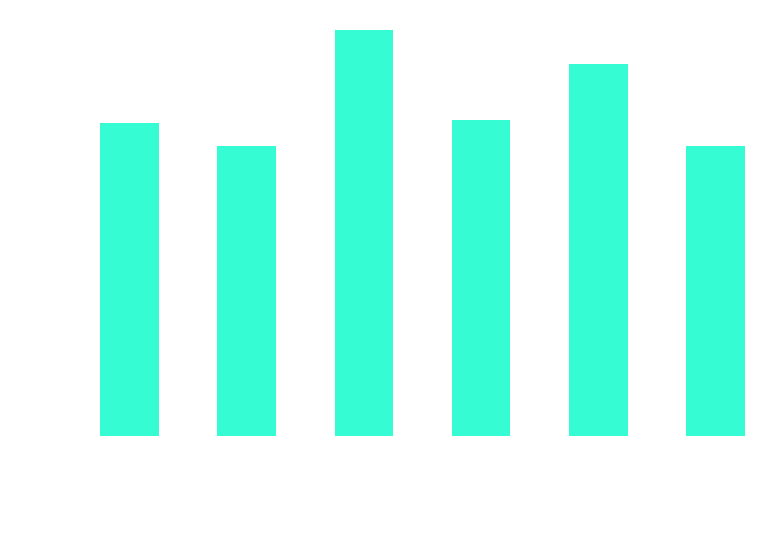

In [45]:
plot_pokemon_stats(df,'Typhlosion')

In [46]:
df

name  generation     type1    type2  height  weight   hp  \
0        Bulbasaur           1     Grass   Poison     0.7     6.9   45   
1          Ivysaur           1     Grass   Poison     1.0    13.0   60   
2         Venusaur           1     Grass   Poison     2.0   100.0   80   
3       Charmander           1      Fire      NaN     0.6     8.5   39   
4       Charmeleon           1      Fire      NaN     1.1    19.0   58   
...            ...         ...       ...      ...     ...     ...  ...   
1020   Raging Bolt           9  Electric   Dragon     5.2   480.0  125   
1021  Iron Boulder           9      Rock  Psychic     1.5   162.5   90   
1022    Iron Crown           9     Steel  Psychic     1.6   156.0   90   
1023     Terapagos           9    Normal      NaN     0.2     6.5   90   
1024     Pecharunt           9    Poison    Ghost     0.3     0.3   88   

      attack  defense  sp_atk  sp_def  speed  total  catch_rate  \
0         49       49      65      65     45    318          45   
1         62       63      80      80     60    405          45   
2         82       83     100     100     80    525          45   
3         52       43      60      50     65    309          45   
4         64       58      80      65     80    405          45   
...      ...      ...     ...     ...    ...    ...         ...   
1020      73       91     137      89     75    590          10   
1021     120       80      68     108    124    590          10   
1022      72      100     122     108     98    590          10   
1023      65       85      65      85     60    450         255   
1024      88      160      88      88     88    600           3   

     base_friendship base_exp  growth_rate egg_cycles    special_group  \
0                 50       64  Medium Slow         20         Ordinary   
1                 50      142  Medium Slow         20         Ordinary   
2                 50      236  Medium Slow         20         Ordinary   
3                 50       62  Medium Slow         20         Ordinary   
4                 50      142  Medium Slow         20         Ordinary   
...              ...      ...          ...        ...              ...   
1020               —        —         Slow          —  Ancient Paradox   
1021               —        —         Slow          —   Future Paradox   
1022               —        —         Slow          —   Future Paradox   
1023               —        —         Slow          —        Legendary   
1024               —        —         Slow          —         Mythical   

      dual_type  growth_rate_Fast  growth_rate_Fluctuating  \
0             1                 0                        0   
1             1                 0                        0   
2             1                 0                        0   
3             0                 0                        0   
4             0                 0                        0   
...         ...               ...                      ...   
1020          1                 0                        0   
1021          1                 0                        0   
1022          1                 0                        0   
1023          0                 0                        0   
1024          1                 0                        0   

      growth_rate_Medium_Fast  growth_rate_Medium_Slow  growth_rate_Slow  \
0                           0                        1                 0   
1                           0                        1                 0   
2                           0                        1                 0   
3                           0                        1                 0   
4                           0                        1                 0   
...                       ...                      ...               ...   
1020                        0                        0                 1   
1021                        0                        0                 1   
10